In [239]:
import numpy as np
import pandas as pd
import yfinance as yf
#from yahoofinancials import YahooFinancials
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
from itertools import combinations
import datetime
import time
import warnings
warnings.filterwarnings('ignore')

In [240]:
da=pd.DataFrame()
data=pd.DataFrame()

coin=['BTC','UNI','SUSHI','CRV','SOL','MANA','COMP','DOGE','BAT','MATIC','ENJ','XMR','LINK','BCH','XLM','ADA','BNB','LTC','ETH']
#encoding= 'latin-1'

In [241]:
st = datetime.datetime(2022, 1, 1, 0, 0)
en = datetime.datetime(2022, 3, 2, 0, 0)

j=1
for i in coin:
    da=pd.read_pickle(str(i)+'.pkl')
    da=da[st:en]
    #data[i]=da['close']
    data[i]=(da.groupby(pd.Grouper(freq='5Min')).agg({"open": "first","close": "last","low": "min","high": "max"})['close'])

In [242]:
data

,BTC,UNI,SUSHI,CRV,SOL,MANA,COMP,DOGE,BAT,MATIC,ENJ,XMR,LINK,BCH,XLM,ADA,BNB,LTC,ETH
ts,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,46321.34,17.08,9.457,5.371,170.40,3.2692,200.5,0.1705,1.2140,2.541,2.586,229.5,19.57,431.8,0.2664,1.314,512.9,146.4,3690.09
2022-01-01 00:05:00,46371.11,17.09,9.436,5.377,170.60,3.2726,200.8,0.1703,1.2188,2.545,2.590,229.8,19.58,432.0,0.2669,1.316,513.3,146.6,3696.55
2022-01-01 00:10:00,46332.51,17.11,9.456,5.384,170.85,3.2731,201.1,0.1705,1.2176,2.546,2.591,229.5,19.60,431.9,0.2667,1.317,513.5,146.7,3691.90
2022-01-01 00:15:00,46293.90,17.08,9.455,5.375,171.07,3.2782,201.0,0.1703,1.2142,2.536,2.583,230.7,19.57,432.2,0.2667,1.317,513.5,146.6,3689.51
2022-01-01 00:20:00,46395.53,17.10,9.437,5.417,171.20,3.2839,202.3,0.1709,1.2340,2.548,2.597,230.9,19.64,433.5,0.2678,1.322,514.3,147.0,3699.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-01 23:40:00,44396.91,10.35,3.477,2.544,98.83,2.8476,126.1,0.1342,0.7568,1.626,1.606,177.6,15.39,328.1,0.1988,0.965,408.9,112.6,2973.46
2022-03-01 23:45:00,44405.29,10.36,3.475,2.541,98.62,2.8433,126.0,0.1339,0.7561,1.626,1.603,177.4,15.35,328.4,0.1988,0.964,408.7,112.5,2975.00
2022-03-01 23:50:00,44371.88,10.33,3.467,2.544,98.71,2.8384,125.8,0.1339,0.7537,1.621,1.599,177.2,15.32,328.2,0.1985,0.962,408.2,112.5,2971.80


In [243]:
data.index

DatetimeIndex(['2022-01-01 00:00:00', '2022-01-01 00:05:00',
               '2022-01-01 00:10:00', '2022-01-01 00:15:00',
               '2022-01-01 00:20:00', '2022-01-01 00:25:00',
               '2022-01-01 00:30:00', '2022-01-01 00:35:00',
               '2022-01-01 00:40:00', '2022-01-01 00:45:00',
               ...
               '2022-03-01 23:15:00', '2022-03-01 23:20:00',
               '2022-03-01 23:25:00', '2022-03-01 23:30:00',
               '2022-03-01 23:35:00', '2022-03-01 23:40:00',
               '2022-03-01 23:45:00', '2022-03-01 23:50:00',
               '2022-03-01 23:55:00', '2022-03-02 00:00:00'],
              dtype='datetime64[ns]', name='ts', length=17281, freq='5T')

In [244]:
data.isnull().sum()

BTC      0
UNI      0
SUSHI    0
CRV      0
SOL      0
MANA     0
COMP     0
DOGE     0
BAT      0
MATIC    0
ENJ      0
XMR      0
LINK     0
BCH      0
XLM      0
ADA      0
BNB      0
LTC      0
ETH      0
dtype: int64

In [245]:
#Data is null only in beginning drop
from itertools import groupby

def contiguous(seq):
    return sum(1 for k,g in groupby(seq, lambda x: x is not None) if k) == 1

In [246]:
contiguous(data)

True

In [247]:
data.dropna(inplace=True)

In [248]:
data

,BTC,UNI,SUSHI,CRV,SOL,MANA,COMP,DOGE,BAT,MATIC,ENJ,XMR,LINK,BCH,XLM,ADA,BNB,LTC,ETH
ts,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,46321.34,17.08,9.457,5.371,170.40,3.2692,200.5,0.1705,1.2140,2.541,2.586,229.5,19.57,431.8,0.2664,1.314,512.9,146.4,3690.09
2022-01-01 00:05:00,46371.11,17.09,9.436,5.377,170.60,3.2726,200.8,0.1703,1.2188,2.545,2.590,229.8,19.58,432.0,0.2669,1.316,513.3,146.6,3696.55
2022-01-01 00:10:00,46332.51,17.11,9.456,5.384,170.85,3.2731,201.1,0.1705,1.2176,2.546,2.591,229.5,19.60,431.9,0.2667,1.317,513.5,146.7,3691.90
2022-01-01 00:15:00,46293.90,17.08,9.455,5.375,171.07,3.2782,201.0,0.1703,1.2142,2.536,2.583,230.7,19.57,432.2,0.2667,1.317,513.5,146.6,3689.51
2022-01-01 00:20:00,46395.53,17.10,9.437,5.417,171.20,3.2839,202.3,0.1709,1.2340,2.548,2.597,230.9,19.64,433.5,0.2678,1.322,514.3,147.0,3699.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-01 23:40:00,44396.91,10.35,3.477,2.544,98.83,2.8476,126.1,0.1342,0.7568,1.626,1.606,177.6,15.39,328.1,0.1988,0.965,408.9,112.6,2973.46
2022-03-01 23:45:00,44405.29,10.36,3.475,2.541,98.62,2.8433,126.0,0.1339,0.7561,1.626,1.603,177.4,15.35,328.4,0.1988,0.964,408.7,112.5,2975.00
2022-03-01 23:50:00,44371.88,10.33,3.467,2.544,98.71,2.8384,125.8,0.1339,0.7537,1.621,1.599,177.2,15.32,328.2,0.1985,0.962,408.2,112.5,2971.80


<AxesSubplot:xlabel='ts'>

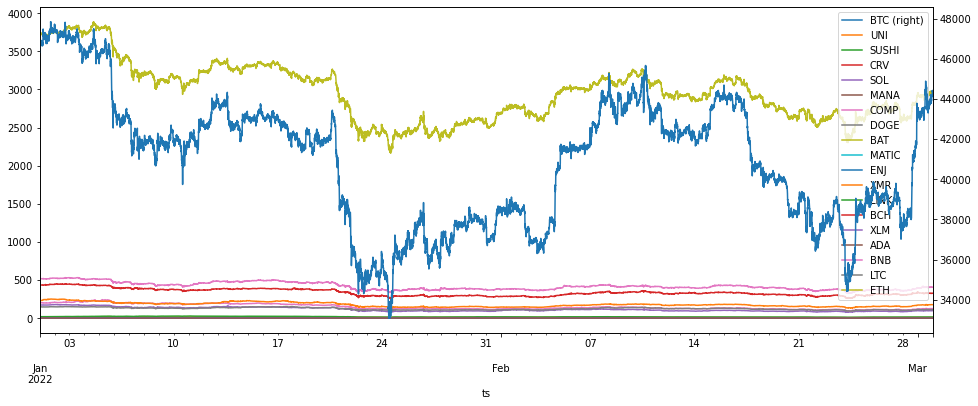

In [249]:
data.plot(secondary_y='BTC',figsize=(16,6))


## Eager Graner Approach

### Adf test for Stationary series.

In [250]:
from statsmodels.tsa.stattools import adfuller

In [251]:
#ADF test
def ADFtest(df):
    for stock in df.columns:
        result=adfuller(df[stock])
        print('p-value: {0} for {1}'.format(result[1],stock))
        if(result[1]<=0.05):
            print("Against Null hypo data is stationary")
        else:
            print("For Null hypo data is not stationary")

In [252]:
ADFtest(data)

p-value: 0.2548133529638422 for BTC
For Null hypo data is not stationary
p-value: 0.5417183250873342 for UNI
For Null hypo data is not stationary
p-value: 0.11789959917538989 for SUSHI
For Null hypo data is not stationary
p-value: 0.5599418700159066 for CRV
For Null hypo data is not stationary
p-value: 0.2681290371316034 for SOL
For Null hypo data is not stationary
p-value: 0.20168742363331132 for MANA
For Null hypo data is not stationary
p-value: 0.5588028106648691 for COMP
For Null hypo data is not stationary
p-value: 0.29513318804456784 for DOGE
For Null hypo data is not stationary
p-value: 0.37379036369187635 for BAT
For Null hypo data is not stationary
p-value: 0.23613431440520444 for MATIC
For Null hypo data is not stationary
p-value: 0.5043376121879821 for ENJ
For Null hypo data is not stationary
p-value: 0.33737357470431906 for XMR
For Null hypo data is not stationary
p-value: 0.7781423721382166 for LINK
For Null hypo data is not stationary
p-value: 0.2291325831430922 for BCH
F

In [253]:
data_diff=pd.DataFrame()
for i in coin:
    data_diff[i]=data[i]-data[i].shift(1)

In [254]:
data_diff.dropna(inplace=True)
ADFtest(data_diff)

p-value: 0.0 for BTC
Against Null hypo data is stationary
p-value: 0.0 for UNI
Against Null hypo data is stationary
p-value: 0.0 for SUSHI
Against Null hypo data is stationary
p-value: 0.0 for CRV
Against Null hypo data is stationary
p-value: 0.0 for SOL
Against Null hypo data is stationary
p-value: 0.0 for MANA
Against Null hypo data is stationary
p-value: 0.0 for COMP
Against Null hypo data is stationary
p-value: 0.0 for DOGE
Against Null hypo data is stationary
p-value: 0.0 for BAT
Against Null hypo data is stationary
p-value: 0.0 for MATIC
Against Null hypo data is stationary
p-value: 0.0 for ENJ
Against Null hypo data is stationary
p-value: 0.0 for XMR
Against Null hypo data is stationary
p-value: 0.0 for LINK
Against Null hypo data is stationary
p-value: 0.0 for BCH
Against Null hypo data is stationary
p-value: 0.0 for XLM
Against Null hypo data is stationary
p-value: 0.0 for ADA
Against Null hypo data is stationary
p-value: 0.0 for BNB
Against Null hypo data is stationary
p-valu

### Testing for Cointegration

In [255]:
#I(1)target and I(1) variable
'''
alt_coin=['ETH', 'BAT','UNI', 'LINK','COMP', 'MANA', 'MATIC','CRO', 'LTC', 'ENJ', 'CRV', 'SUSHI']
residuals=pd.DataFrame()
for i in alt_coin:
    Y = data[i]
    X = data['BTC']
    X= sm.add_constant(X)
    model = sm.OLS(Y,X)
    results = model.fit()
    residuals[i]= pd.DataFrame(results.resid)
'''


"\nalt_coin=['ETH', 'BAT','UNI', 'LINK','COMP', 'MANA', 'MATIC','CRO', 'LTC', 'ENJ', 'CRV', 'SUSHI']\nresiduals=pd.DataFrame()\nfor i in alt_coin:\n    Y = data[i]\n    X = data['BTC']\n    X= sm.add_constant(X)\n    model = sm.OLS(Y,X)\n    results = model.fit()\n    residuals[i]= pd.DataFrame(results.resid)\n"

In [256]:
pair=pd.DataFrame()
for i in coin:
    for j in coin:
        if i!=j:
            Y = data[i]
            X = data[j]
            X= sm.add_constant(X)
            model = sm.OLS(Y,X)
            results = model.fit()
            resid_dumm= pd.DataFrame(results.resid)
            p_value=adfuller(resid_dumm)
            if p_value[1]<0.05:
                pair[(i,j)]= pd.DataFrame(results.resid)            

In [257]:

pair.info()
#(Dependent,independent)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17281 entries, 2022-01-01 00:00:00 to 2022-03-02 00:00:00
Freq: 5T
Data columns (total 91 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (UNI, SUSHI)    17281 non-null  float64
 1   (UNI, CRV)      17281 non-null  float64
 2   (UNI, SOL)      17281 non-null  float64
 3   (UNI, COMP)     17281 non-null  float64
 4   (UNI, MATIC)    17281 non-null  float64
 5   (UNI, LINK)     17281 non-null  float64
 6   (SUSHI, UNI)    17281 non-null  float64
 7   (SUSHI, CRV)    17281 non-null  float64
 8   (SUSHI, SOL)    17281 non-null  float64
 9   (SUSHI, COMP)   17281 non-null  float64
 10  (SUSHI, ENJ)    17281 non-null  float64
 11  (SUSHI, LINK)   17281 non-null  float64
 12  (SUSHI, XLM)    17281 non-null  float64
 13  (SUSHI, ADA)    17281 non-null  float64
 14  (CRV, UNI)      17281 non-null  float64
 15  (CRV, SUSHI)    17281 non-null  float64
 16  (CRV, SOL)      17281 non-null  

### ECM 

In [258]:
pair.columns

Index([  ('UNI', 'SUSHI'),     ('UNI', 'CRV'),     ('UNI', 'SOL'),
          ('UNI', 'COMP'),   ('UNI', 'MATIC'),    ('UNI', 'LINK'),
         ('SUSHI', 'UNI'),   ('SUSHI', 'CRV'),   ('SUSHI', 'SOL'),
        ('SUSHI', 'COMP'),   ('SUSHI', 'ENJ'),  ('SUSHI', 'LINK'),
         ('SUSHI', 'XLM'),   ('SUSHI', 'ADA'),     ('CRV', 'UNI'),
         ('CRV', 'SUSHI'),     ('CRV', 'SOL'),    ('CRV', 'COMP'),
           ('CRV', 'BAT'),   ('CRV', 'MATIC'),     ('CRV', 'ENJ'),
          ('CRV', 'LINK'),     ('SOL', 'UNI'),   ('SOL', 'SUSHI'),
           ('SOL', 'CRV'),    ('SOL', 'COMP'),     ('SOL', 'ENJ'),
          ('SOL', 'LINK'),     ('SOL', 'XLM'),    ('COMP', 'UNI'),
        ('COMP', 'SUSHI'),    ('COMP', 'CRV'),    ('COMP', 'SOL'),
         ('COMP', 'LINK'),    ('COMP', 'XLM'),    ('DOGE', 'CRV'),
        ('DOGE', 'MATIC'),    ('DOGE', 'ENJ'),    ('DOGE', 'XMR'),
          ('DOGE', 'ADA'),    ('DOGE', 'LTC'),     ('BAT', 'CRV'),
           ('BAT', 'ENJ'),    ('BAT', 'LINK'),     ('BAT', 'XL

In [260]:
data_diff_1=data_diff.shift(1)
data_diff_1.fillna(method='bfill',inplace=True)


In [261]:
ecmodel=pd.DataFrame
sel_pair=[]
error_coeff=[]
for i in pair.columns:
    
    y=pd.DataFrame()
    y= pd.DataFrame(data_diff[i[0]]) ###(Dependent,independent)
    X=pd.DataFrame()
    X[str(i[0])+"1"]=data_diff_1[i[0]] #Extended eqn of Graner Approach.
    X[i[1]]=data_diff[i[1]]
    X[str(i[1])+"1"]=data_diff_1[i[1]]
         
    X['residual']= pair[i]
    X=sm.add_constant(X)
    
    store= data[i[1]].shift(1)
    store.fillna(method='bfill',inplace=True)
    X[str(i[1])+'res']=data[i[1]]-store
    
    
    model=sm.OLS(y,X)
    results=model.fit()
    print("Error COefficient of {0} pair is {1}".format(i,results.params.loc['residual']))
    print(results.summary())
    error_coeff.append(results.params.loc['residual'])
    sel_pair.append(i)
    
    
sel_pair1=pd.DataFrame()
sel_pair1['pairs']= sel_pair
sel_pair1['error_coeff']= error_coeff

Error COefficient of ('UNI', 'SUSHI') pair is 0.0004560049203346795
                            OLS Regression Results                            
Dep. Variable:                    UNI   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     4764.
Date:                Sat, 25 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:43:40   Log-Likelihood:                 35181.
No. Observations:               17280   AIC:                        -7.035e+04
Df Residuals:                   17275   BIC:                        -7.031e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

Error COefficient of ('UNI', 'MATIC') pair is 0.00020750275617866068
                            OLS Regression Results                            
Dep. Variable:                    UNI   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     5761.
Date:                Sat, 25 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:43:41   Log-Likelihood:                 36080.
No. Observations:               17280   AIC:                        -7.215e+04
Df Residuals:                   17275   BIC:                        -7.211e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

Error COefficient of ('SUSHI', 'COMP') pair is 0.000259332018550962
                            OLS Regression Results                            
Dep. Variable:                  SUSHI   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     4739.
Date:                Sat, 25 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:43:41   Log-Likelihood:                 47482.
No. Observations:               17280   AIC:                        -9.495e+04
Df Residuals:                   17275   BIC:                        -9.491e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

Error COefficient of ('SUSHI', 'ADA') pair is 2.0788020810811294e-05
                            OLS Regression Results                            
Dep. Variable:                  SUSHI   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     2999.
Date:                Sat, 25 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:43:41   Log-Likelihood:                 45638.
No. Observations:               17280   AIC:                        -9.127e+04
Df Residuals:                   17275   BIC:                        -9.123e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

Error COefficient of ('CRV', 'BAT') pair is 0.0009129512795982644
                            OLS Regression Results                            
Dep. Variable:                    CRV   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     3446.
Date:                Sat, 25 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:43:42   Log-Likelihood:                 50396.
No. Observations:               17280   AIC:                        -1.008e+05
Df Residuals:                   17275   BIC:                        -1.007e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

Error COefficient of ('SOL', 'UNI') pair is 0.0011341904617498194
                            OLS Regression Results                            
Dep. Variable:                    SOL   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     5142.
Date:                Sat, 25 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:43:42   Log-Likelihood:                -3310.1
No. Observations:               17280   AIC:                             6630.
Df Residuals:                   17275   BIC:                             6669.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

Error COefficient of ('SOL', 'ENJ') pair is 0.0007553648041457684
                            OLS Regression Results                            
Dep. Variable:                    SOL   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     5544.
Date:                Sat, 25 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:43:42   Log-Likelihood:                -2950.6
No. Observations:               17280   AIC:                             5911.
Df Residuals:                   17275   BIC:                             5950.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:                   COMP   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     3632.
Date:                Sat, 25 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:43:43   Log-Likelihood:                -8215.9
No. Observations:               17280   AIC:                         1.644e+04
Df Residuals:                   17275   BIC:                         1.648e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0008      0.003     -0.286      0.7

                            OLS Regression Results                            
Dep. Variable:                   DOGE   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     3203.
Date:                Sat, 25 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:43:44   Log-Likelihood:             1.1119e+05
No. Observations:               17280   AIC:                        -2.224e+05
Df Residuals:                   17275   BIC:                        -2.223e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.059e-07   2.96e-06      0.171      0.8

Error COefficient of ('BAT', 'ENJ') pair is 0.0013933079224470553
                            OLS Regression Results                            
Dep. Variable:                    BAT   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     6681.
Date:                Sat, 25 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:43:44   Log-Likelihood:                 83580.
No. Observations:               17280   AIC:                        -1.671e+05
Df Residuals:                   17275   BIC:                        -1.671e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

Error COefficient of ('MATIC', 'COMP') pair is 0.0009226948731129535
                            OLS Regression Results                            
Dep. Variable:                  MATIC   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     4689.
Date:                Sat, 25 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:43:45   Log-Likelihood:                 68639.
No. Observations:               17280   AIC:                        -1.373e+05
Df Residuals:                   17274   BIC:                        -1.372e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

Error COefficient of ('MATIC', 'BNB') pair is 0.0017417639218058043
                            OLS Regression Results                            
Dep. Variable:                  MATIC   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     5906.
Date:                Sat, 25 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:43:45   Log-Likelihood:                 69842.
No. Observations:               17280   AIC:                        -1.397e+05
Df Residuals:                   17274   BIC:                        -1.396e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

Error COefficient of ('XMR', 'MATIC') pair is 0.0009455003029698659
                            OLS Regression Results                            
Dep. Variable:                    XMR   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     4059.
Date:                Sat, 25 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:43:46   Log-Likelihood:                -7768.9
No. Observations:               17280   AIC:                         1.555e+04
Df Residuals:                   17275   BIC:                         1.559e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

Error COefficient of ('LINK', 'SOL') pair is 1.9919866052652116e-05
                            OLS Regression Results                            
Dep. Variable:                   LINK   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     4513.
Date:                Sat, 25 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:43:46   Log-Likelihood:                 25658.
No. Observations:               17280   AIC:                        -5.131e+04
Df Residuals:                   17275   BIC:                        -5.127e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

Error COefficient of ('XLM', 'SUSHI') pair is 0.0005927228360230952
                            OLS Regression Results                            
Dep. Variable:                    XLM   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     3743.
Date:                Sat, 25 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:43:47   Log-Likelihood:             1.0714e+05
No. Observations:               17280   AIC:                        -2.143e+05
Df Residuals:                   17275   BIC:                        -2.142e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

Error COefficient of ('XLM', 'ENJ') pair is 0.0020895363206499965
                            OLS Regression Results                            
Dep. Variable:                    XLM   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     5678.
Date:                Sat, 25 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:43:47   Log-Likelihood:             1.0900e+05
No. Observations:               17280   AIC:                        -2.180e+05
Df Residuals:                   17275   BIC:                        -2.179e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

Error COefficient of ('BNB', 'LINK') pair is 2.3372590339216576e-05
                            OLS Regression Results                            
Dep. Variable:                    BNB   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     5232.
Date:                Sat, 25 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:43:47   Log-Likelihood:                -17862.
No. Observations:               17280   AIC:                         3.573e+04
Df Residuals:                   17275   BIC:                         3.577e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

Error COefficient of ('ETH', 'XMR') pair is 0.0008226547452697874
                            OLS Regression Results                            
Dep. Variable:                    ETH   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     5219.
Date:                Sat, 25 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:43:48   Log-Likelihood:                -53644.
No. Observations:               17280   AIC:                         1.073e+05
Df Residuals:                   17275   BIC:                         1.073e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

In [262]:
sel_pair1.sort_values(by='error_coeff')

,pairs,error_coeff
11,"(SUSHI, LINK)",-0.000372
65,"(LINK, SUSHI)",-0.000160
27,"(SOL, LINK)",-0.000080
70,"(BCH, LINK)",-0.000043
52,"(MATIC, LINK)",-0.000018
...,...,...
59,"(ENJ, XLM)",0.002007
78,"(XLM, ENJ)",0.002090
40,"(DOGE, LTC)",0.002146
83,"(BNB, XMR)",0.002156


In [263]:
def zscore(series):
    return (series - series.mean()) / np.std(series)

In [264]:
r=sm.OLS(data['SUSHI'],data['LINK']).fit()
hedge= r.params
#pair = data[['MANA', 'ADA' ]]
#pair['series'] = (data['MANA']-data['ADA']*hedge[0])
#pair['norm_series'] = zscore(pair['series'])

pair = data[['SUSHI', 'LINK' ]]
pair['series'] = (data['SUSHI']-data['LINK'])
pair['norm_series'] = zscore(pair['series'])


In [265]:
ratio= data['SUSHI']-data['LINK']*hedge[0]

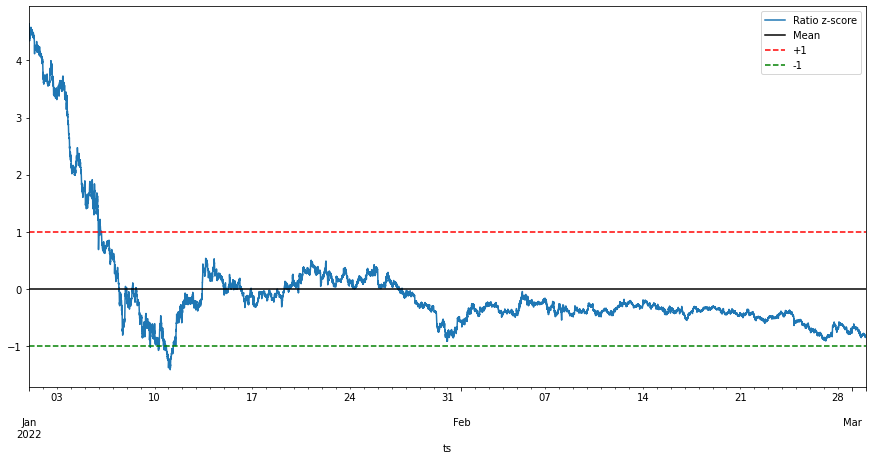

In [266]:
zscore(ratio).plot(figsize=(15,7))
plt.axhline(zscore(ratio).mean(), color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Ratio z-score', 'Mean', '+1', '-1'])
plt.show()

In [267]:
pair

,SUSHI,LINK,series,norm_series
ts,,,,
2022-01-01 00:00:00,9.457,19.57,-10.113,1.165534
2022-01-01 00:05:00,9.436,19.58,-10.144,1.155379
2022-01-01 00:10:00,9.456,19.60,-10.144,1.155379
2022-01-01 00:15:00,9.455,19.57,-10.115,1.164879
2022-01-01 00:20:00,9.437,19.64,-10.203,1.136051
...,...,...,...,...
2022-03-01 23:40:00,3.477,15.39,-11.913,0.575864
2022-03-01 23:45:00,3.475,15.35,-11.875,0.588312
2022-03-01 23:50:00,3.467,15.32,-11.853,0.595519


In [268]:
def _level_crosses(series, level):
    change = []
    for i,el in enumerate(series):
        if (i!=0) and series[i]>level and series[i-1]<level:
            change.append(1)
        elif (i!=0) and series[i]<level and series[i-1]>level:
            change.append(-1)
        else:
            change.append(0)
    return change    

In [269]:
stop_losses = []
open_positions= []
closed_positions = []
profits = []

def trading_signals_1(spread, n_series):
   # print(open_pos)
    upper_trading = _level_crosses(n_series, level = 1)
    #print(upper_trading)
    lower_trading = _level_crosses(n_series, level = -1)
    #print(lower_trading)
    upper_stop = _level_crosses(n_series, level = 1.5)
    #upper_stop[0] = 
    lower_stop = _level_crosses(n_series, level = -1.5)
    #lower_stop[0] = l
    mean = _level_crosses(n_series, level = 0)
    open_pos=False
    
    for i in range(1, len(n_series)):
        if open_pos:
            #print('open')
            if (upper_stop[i] == 1 and f==1) or (lower_stop[i] == -1 and f==0):
                open_pos = False
                profits.append(-abs(spread[i] - entry_level))
                stop_losses.append((i,f))
            elif mean[i]!=0:
                open_pos = False
                profits.append(abs(spread[i] - entry_level))
                closed_positions.append((i,f))
            else:
                profits.append(0)
        
        else:
            #print('else')
            if upper_trading[i] == -1 or lower_trading[i] == 1:
                #print('yes')
                open_pos = True
                entry_level = spread[i]
                
                if upper_trading[i] == -1:
                    f=1
                    open_positions.append((i,f))
                    upper_stop = _level_crosses(n_series, level =1.5+n_series[i])
                    
                else:
                    f=0
                    open_positions.append((i,f))
                    lower_stop = _level_crosses(n_series, level =-1.5+n_series[i])
            profits.append(0)
   
    return stop_losses, open_positions,closed_positions,profits,open_pos, upper_stop[i], lower_stop[i], entry_level,f
        
    
    #if(open_pos):
    #    profits.append()



In [270]:
trading_signals_1(pair['series'], pair['norm_series'])

([(2506, 0)],
 [(13, 1), (1309, 0), (5006, 0), (6172, 1), (14830, 1)],
 [(738, 1), (5805, 0), (8629, 1)],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,

In [271]:
np.sum(profits)

4.152000000000001

In [272]:
tot_profits=pd.DataFrame(profits)
tot_profits= tot_profits[tot_profits!=0]

print("Total Profit is {0}".format(np.sum(profits)))
tot_profits.describe()

Total Profit is 4.152000000000001


,0
count,4.000000
mean,1.038000
std,3.934061
min,-4.863000
25%,1.015500
50%,2.994000
75%,3.016500
max,3.027000


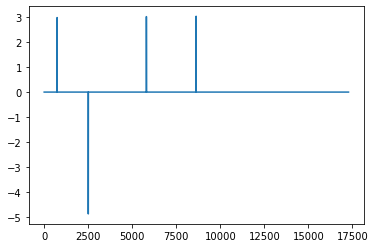

In [273]:
plt.plot(profits)

In [274]:
open_positions

[(13, 1), (1309, 0), (5006, 0), (6172, 1), (14830, 1)]

In [275]:
closed_positions

[(738, 1), (5805, 0), (8629, 1)]

In [276]:
stop_losses

[(2506, 0)]

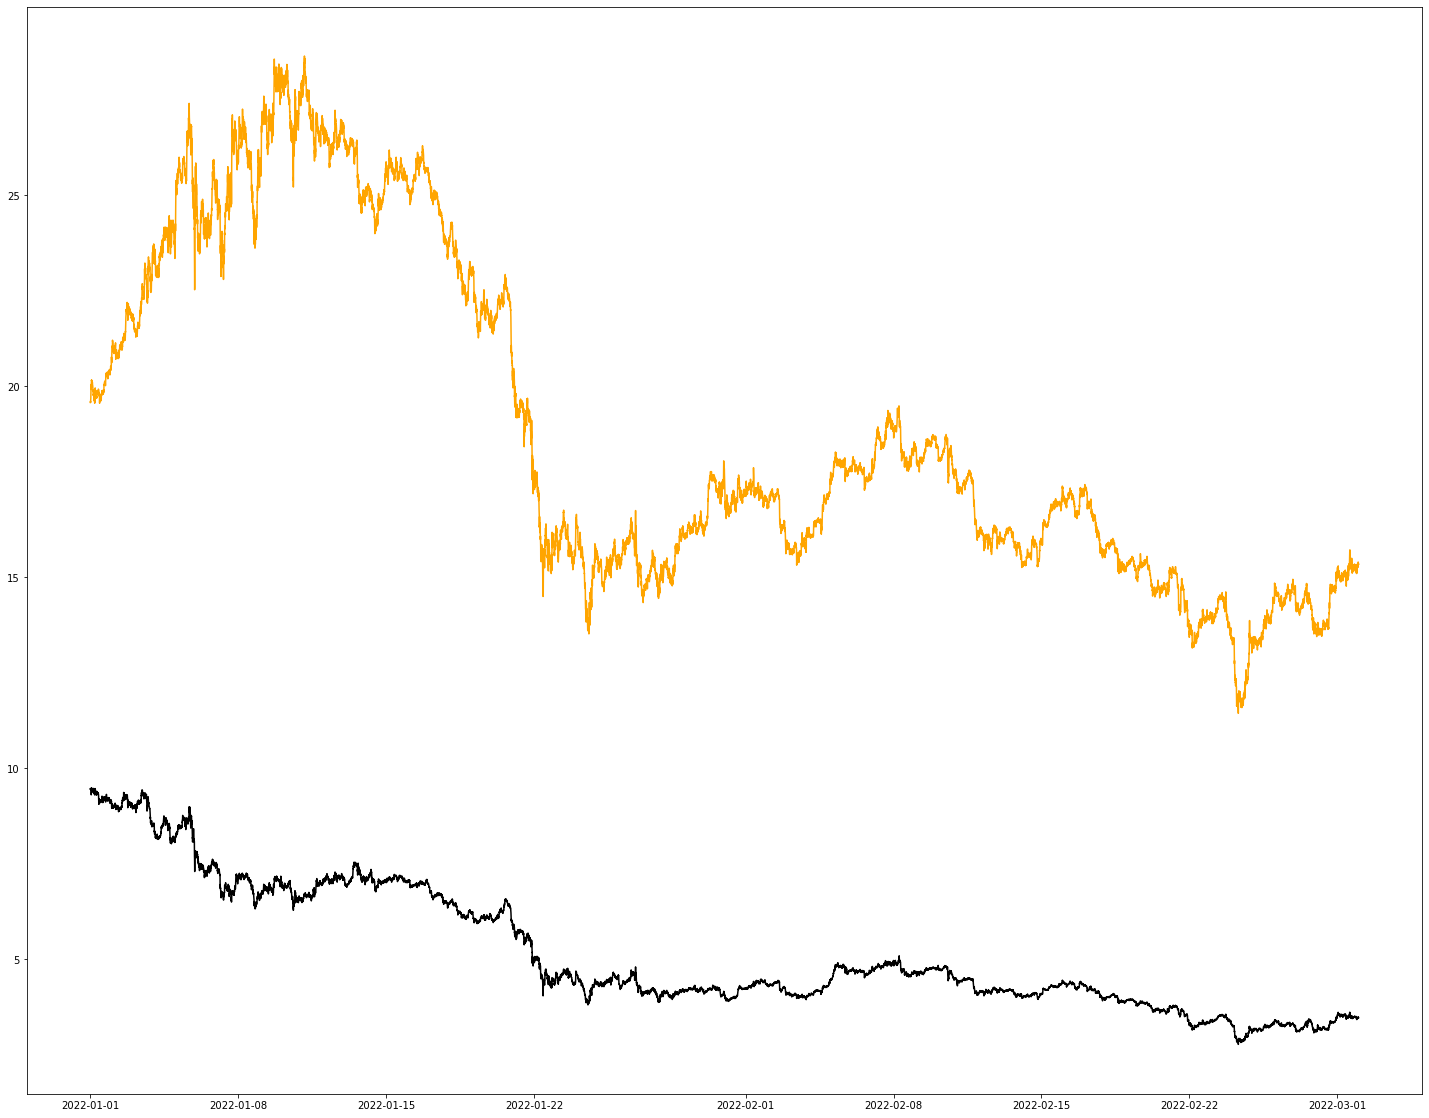

In [277]:
plt.figure(figsize=(25, 20))
ax=plt.plot(pair['SUSHI'], color= 'black')
ax=plt.plot(pair['LINK'], color= 'orange')

In [278]:
op = []
for i in open_positions:
    op.append(i[0])
cl = []
for i in closed_positions:
    cl.append(i[0])
sl = []
for i in stop_losses:
    sl.append(i[0])


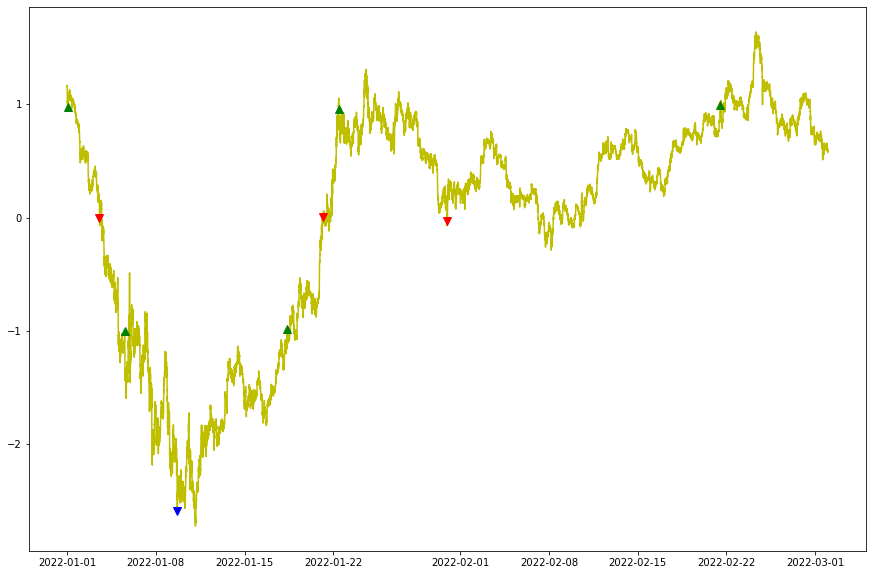

In [279]:
plt.figure(figsize=(15, 10))
plt.plot(pair.iloc[:,[3]], color= 'y')
plt.plot(pair['norm_series'][op], '^', markersize=8, color='g')
plt.plot(pair['norm_series'][cl], 'v', markersize=8, color='r')
plt.plot(pair['norm_series'][sl], 'v', markersize=8, color='b')